In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lou
import glob
import json
from sklearn.metrics import adjusted_rand_score
%matplotlib inline

In [2]:
years = map(str,range(1999,2018))
with open('EU_countries.json') as f:
    countries = json.load(f)['results']
countries_id = [c['id'] for c in countries]
countries_name = {c['id']:c['text'] for c in countries}

In [3]:
files = {y: glob.glob('../../data/comtrade/Export_data_yearly/AG4/{}/Export_{}_*_0.csv'.format(y,y)) for y in years}
files = {y: [f for f in files[y] if f.split('_')[-2] in countries_id] for y in years}

### Check persistency

In [4]:
available_countries = {y : [f.split('_')[-2] for f in files[y]] for y in files}
persisting_countries = reduce(lambda x,y: set.intersection(set(x),set(y)),available_countries.values())
print len(persisting_countries)

28


### Get clusters year by year

In [5]:
comtrade_df = {y: pd.concat([pd.read_csv(f) for f in files[y]],ignore_index=1) for y in years}

comtrade_bip = {}
for y in years:
    comtrade_df[y] = comtrade_df[y][comtrade_df[y]['Commodity Code']!=999]
    comtrade_df[y]['Commodity Code'] = (comtrade_df[y]['Commodity Code']/10).astype(int)
    products = sorted(set(comtrade_df[y]['Commodity Code']))
    dict_countries = dict(zip(countries_id,range(len(countries_id))))
    dict_products = dict(zip(products,range(len(products))))
    bip_mat = np.zeros((len(countries_id),len(products)))
    for c,p,v in np.array(comtrade_df[y][['Reporter Code','Commodity Code','Trade Value (US$)']]):
        bip_mat[dict_countries[str(c)],dict_products[p]] += v
    comtrade_bip[y] = bip_mat

In [6]:
"""Agriculture
Fishing
Mining and Quarrying
Food & Beverages
Textiles and Wearing Apparel
Wood and Paper
Petroleum, Chemical and Non-Metallic Mineral Products
Metal Products
Electrical and Machinery
Transport Equipment
Other Manufacturing
Recycling
Electricity, Gas and Water
Construction
Maintenance and Repair
Wholesale Trade
Retail Trade
Hotels and Restraurants
Transport
Post and Telecommunications
Finacial Intermediation and Business Activities
Public Administration
Education, Health and Other Services
Private Households
Others
Re-export & Re-import
"""

'Agriculture\nFishing\nMining and Quarrying\nFood & Beverages\nTextiles and Wearing Apparel\nWood and Paper\nPetroleum, Chemical and Non-Metallic Mineral Products\nMetal Products\nElectrical and Machinery\nTransport Equipment\nOther Manufacturing\nRecycling\nElectricity, Gas and Water\nConstruction\nMaintenance and Repair\nWholesale Trade\nRetail Trade\nHotels and Restraurants\nTransport\nPost and Telecommunications\nFinacial Intermediation and Business Activities\nPublic Administration\nEducation, Health and Other Services\nPrivate Households\nOthers\nRe-export & Re-import\n'

In [7]:
for a,b in np.array(comtrade_df['1999'][['Commodity Code','Commodity']].drop_duplicates().sort_values('Commodity Code')):
    print a,b

10 Live horses, asses, mules and hinnies
10 Live bovine animals
10 Live swine
10 Live sheep and goats
10 Live poultry, domestic fowls, ducks, geese, etc.
10 Animals, live, except farm animals
20 Meat of bovine animals, fresh or chilled
20 Meat of bovine animals, frozen
20 Meat of swine, fresh, chilled or frozen
20 Meat of sheep or goats, fresh, chilled or frozen
20 Horse, ass, mule, hinny meat, fresh, chilled or frozen
20 Edible offal of domestic animals
20 Meat, edible offal of domestic poultry
20 Meat, edible meat offal nes, fresh, chilled or frozen
20 Pig and poultry fat, unrendered
21 Salted, dried or smoked meat or offal, flour and meal
30 Live fish
30 Fish, fresh or chilled, whole
30 Fish, frozen, whole
30 Fish fillets, fish meat, mince except liver, roe
30 Fish,cured, smoked, fish meal for human consumption
30 Crustaceans
30 Molluscs
40 Milk and cream, neither concentrated nor sweetened
40 Milk and cream, concentrated or sweetened
40 Buttermilk, cream, yogurt etc
40 Whey, natura

In [8]:
#count zeros
for y in sorted(comtrade_bip):
    n,m = comtrade_bip[y].shape
    print y, m, (comtrade_bip[y]==0).sum()/float(n*m)

1999 174 0.012315270935960592
2000 174 0.01087848932676519
2001 174 0.018267651888341542
2002 174 0.009852216748768473
2003 174 0.010467980295566502
2004 174 0.008825944170771757
2005 174 0.008620689655172414
2006 174 0.007183908045977011
2007 174 0.009236453201970444
2008 174 0.010057471264367816
2009 174 0.01087848932676519
2010 174 0.008620689655172414
2011 174 0.012110016420361249
2012 174 0.010057471264367816
2013 174 0.008210180623973728
2014 174 0.007389162561576354
2015 174 0.007389162561576354
2016 174 0.006568144499178982
2017 175 0.008775510204081632


In [9]:
for i,c in enumerate(countries_id):
    print i,countries_name[c]

0 Austria
1 Belgium
2 Bulgaria
3 Croatia
4 Cyprus
5 Czechia
6 Denmark
7 Estonia
8 Finland
9 France
10 Germany
11 Greece
12 Hungary
13 Ireland
14 Italy
15 Latvia
16 Lithuania
17 Luxembourg
18 Malta
19 Netherlands
20 Poland
21 Portugal
22 Romania
23 Slovakia
24 Slovenia
25 Sweden
26 Spain
27 United Kingdom


In [10]:
entrance_1995 = np.array([2,0,1,1,1,1,0,1,2,0,0,0,1,0,0,1,1,0,1,0,1,0,1,1,1,2,0,0])
entrance_2004 = np.array([0,0,1,1,1,1,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,1,1,0,0,0])
entrance_1995_2013 = np.array([2,0,3,4,1,1,0,1,2,0,0,0,1,0,0,1,1,0,1,0,1,0,3,1,1,2,0,0])
entrance_2004_2013 = np.array([0,0,3,3,1,1,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,3,1,1,0,0,0]) # 0 chie era prima, 3 chi e' nel 2007, 1 chi e' entrato nel 2004


clusters = {}
ari = {}
for y in sorted(comtrade_bip):
    H = lou.Find_Membership(comtrade_bip[y])
    print y,len(set(H[0])),len(set(H[1]))
    ari[y] = adjusted_rand_score(entrance_2004_2013,H[1])
    clusters[y] = pd.DataFrame(zip(countries_id,[countries_name[c] for c in countries_id],H[1]),columns=['id','name','cluster'])

1999 1 3
2000 1 3
2001 1 3
2002 1 3
2003 1 3
2004 1 2
2005 1 3
2006 1 2
2007 1 2
2008 1 2
2009 1 3
2010 1 3
2011 1 2
2012 1 3
2013 1 3
2014 1 3
2015 1 2
2016 1 2
2017 1 3


In [11]:
x_years = sorted(ari)
y_ari = [ari[y] for y in sorted(ari)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text xticklabel objects>)

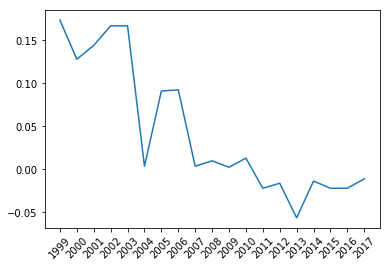

In [12]:
plt.plot(x_years,y_ari)
plt.xticks(rotation=45)

In [13]:
for y in sorted(comtrade_bip):
    print y
    n_clusters = set(clusters[y].cluster)
    for cluster in n_clusters:
        print clusters[y][clusters[y]['cluster']==cluster]['name'].tolist()

1999
[u'Austria', u'Belgium', u'Czechia', u'France', u'Germany', u'Italy', u'Portugal', u'Slovakia', u'Slovenia', u'Spain']
[u'Denmark', u'Finland', u'Hungary', u'Ireland', u'Luxembourg', u'Netherlands', u'Sweden', u'United Kingdom']
[u'Bulgaria', u'Croatia', u'Cyprus', u'Estonia', u'Greece', u'Latvia', u'Lithuania', u'Malta', u'Poland', u'Romania']
2000
[u'Bulgaria', u'Croatia', u'Cyprus', u'Greece', u'Latvia', u'Lithuania', u'Malta', u'Romania']
[u'Belgium', u'Czechia', u'France', u'Germany', u'Italy', u'Poland', u'Portugal', u'Slovakia', u'Slovenia', u'Spain']
[u'Austria', u'Denmark', u'Estonia', u'Finland', u'Hungary', u'Ireland', u'Luxembourg', u'Netherlands', u'Sweden', u'United Kingdom']
2001
[u'Belgium', u'Czechia', u'France', u'Germany', u'Italy', u'Portugal', u'Slovakia', u'Slovenia', u'Spain']
[u'Austria', u'Denmark', u'Estonia', u'Finland', u'Hungary', u'Ireland', u'Luxembourg', u'Netherlands', u'Sweden', u'United Kingdom']
[u'Bulgaria', u'Croatia', u'Cyprus', u'Greece', u'

In [19]:
fitness = pd.read_csv('../competitiveness/YearlyFitness.csv')
fitness.countries = fitness.countries.astype(str)

In [20]:
countries

[{u'id': u'40', u'text': u'Austria'},
 {u'id': u'56', u'text': u'Belgium'},
 {u'id': u'100', u'text': u'Bulgaria'},
 {u'id': u'191', u'text': u'Croatia'},
 {u'id': u'196', u'text': u'Cyprus'},
 {u'id': u'203', u'text': u'Czechia'},
 {u'id': u'208', u'text': u'Denmark'},
 {u'id': u'233', u'text': u'Estonia'},
 {u'id': u'246', u'text': u'Finland'},
 {u'id': u'251', u'text': u'France'},
 {u'id': u'276', u'text': u'Germany'},
 {u'id': u'300', u'text': u'Greece'},
 {u'id': u'348', u'text': u'Hungary'},
 {u'id': u'372', u'text': u'Ireland'},
 {u'id': u'381', u'text': u'Italy'},
 {u'id': u'428', u'text': u'Latvia'},
 {u'id': u'440', u'text': u'Lithuania'},
 {u'id': u'442', u'text': u'Luxembourg'},
 {u'id': u'470', u'text': u'Malta'},
 {u'id': u'528', u'text': u'Netherlands'},
 {u'id': u'616', u'text': u'Poland'},
 {u'id': u'620', u'text': u'Portugal'},
 {u'id': u'642', u'text': u'Romania'},
 {u'id': u'703', u'text': u'Slovakia'},
 {u'id': u'705', u'text': u'Slovenia'},
 {u'id': u'752', u'text

In [21]:
dict_code_id = {'AT' : '40',
               'BE' : '56',
               'BG' : '100',
               'HR' : '191',
               'CY' : '196',
               'CZ' : '203',
               'DK' : '208',
               'EE' : '233',
               'FI' : '246',
               'FR' : '251',
               'DE' : '276',
               'EL' : '300',
               'HU' : '348',
               'IE' : '372',
               'IT' : '381',
               'LV' : '428',
               'LT' : '440',
               'LU' : '442',
               'MT' : '470',
               'NL' : '528',
               'PL' : '616',
               'PT' : '620',
               'RO' : '642',
               'SK' : '703',
               'SI' : '705',
               'SE' : '752',
               'ES' : '724',
               'UK' : '826'}

In [22]:
gdp_per_capita = pd.read_csv('GDP_per_capita.csv')
gdp_per_capita['country_code'] = gdp_per_capita.country_code.apply(lambda x: dict_code_id[x])


In [23]:
ratio_fitness = []
eu_fitness = []
world_fitness = []
for y in sorted(years):
    dict_fit = dict(np.array(fitness[['countries',y]]))
    dict_gdp = dict(np.array(gdp_per_capita[['country_code',y]]))
    clusters[y]['fitness'] = [dict_fit[(c)] for c in clusters[y]['id']]
    clusters[y]['gdp'] = [dict_gdp[(c)] for c in clusters[y]['id']]
    ratio_fitness.append((fitness[fitness.countries.isin(countries_id)][y].sum())/(fitness[y].sum()))
    eu_fitness.append((fitness[fitness.countries.isin(countries_id)][y].mean()))
    world_fitness.append(fitness[y].mean())

In [24]:
for y in years:
    clusters[y].to_csv('ClustersSummaryEU{}.csv'.format(y),index=None)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text xticklabel objects>)

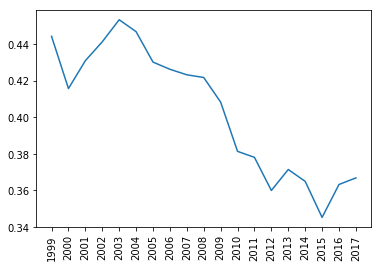

In [25]:
plt.plot(years,ratio_fitness)
plt.xticks(rotation=90)

In [26]:
pd.DataFrame(zip(years,ratio_fitness,y_ari),columns=['year','eu_fitness','ari']).to_csv('network_data/network.csv',index=None)

In [27]:
for y in years:
    print y
    print clusters[y].groupby('cluster').aggregate(['mean','std'])

1999
          fitness                gdp              
             mean       std     mean           std
cluster                                           
0        2.988407  3.386711  16520.0   8268.790050
1        1.627784  1.685756  26937.5  11939.243515
2        0.106164  0.153287   6400.0   4740.516849
2000
          fitness                gdp              
             mean       std     mean           std
cluster                                           
0        0.064808  0.053006   7800.0   5459.242927
1        1.342951  1.448550  26760.0  13900.055955
2        2.719785  3.121066  15220.0   8650.086705
2001
          fitness                     gdp              
             mean       std          mean           std
cluster                                                
0        0.133027  0.194082   7950.000000   5342.016741
1        3.112092  3.415157  17133.333333   8402.975663
2        1.344647  1.422300  27670.000000  13952.224036
2002
          fitness               

In [28]:
import seaborn as sns

In [29]:
#sns.pairplot(clusters['1999'], hue="cluster")

In [30]:
df_cluster

NameError: name 'df_cluster' is not defined

(0, 113404.52284984372)

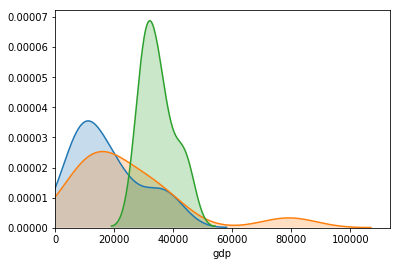

In [31]:
df_cluster = clusters['2010']
for c in set(df_cluster.cluster):
    sns.distplot(df_cluster.query('cluster=="{}"'.format(c))['gdp'], hist=False, kde_kws={"shade": True},hist_kws = {'normed' : True},bins=20)
plt.xlim(0,plt.gca().get_xlim()[1])

#plt.yscale('log')

In [47]:
cc = clusters['2000'].groupby('cluster')['gdp']

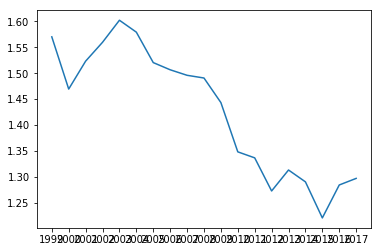

In [68]:
plt.plot(years,eu_fitness)

In [74]:
clusters['1999']

,id,name,cluster,fitness
0,40,Austria,2,1.177870
1,56,Belgium,2,3.310011
2,100,Bulgaria,1,0.067799
3,191,Croatia,1,0.067165
4,196,Cyprus,1,0.010955
5,203,Czechia,2,0.603374
6,208,Denmark,0,0.996116
7,233,Estonia,1,0.046903
8,246,Finland,0,0.751206
9,251,France,2,5.317126


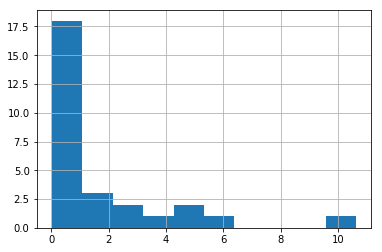

In [72]:
clusters['1999']['fitness'].hist()

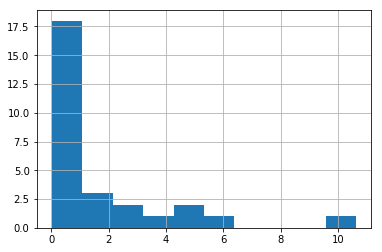

In [73]:
clusters['1999']['fitness'].hist()